# Machine Learning Toolbox

## Data Generators

In [312]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")
plt.style.use("seaborn-muted")

#### Random white noise

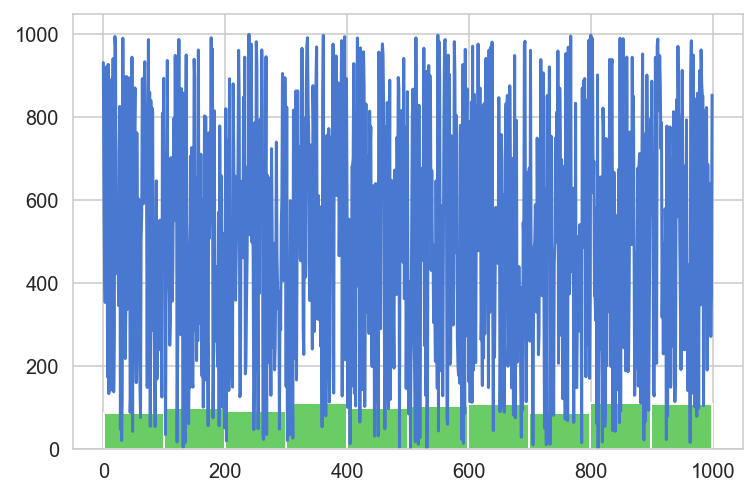

In [316]:
def make_noise (sample_size, min_val, max_val):
    X = np.random.uniform(size = sample_size,
                         low = min_val,
                         high = max_val)
    return X

white_noise = make_noise(1000,0,1000)
p = plt.plot(white_noise)
p = plt.hist(white_noise)

#### Gaussian Distribution

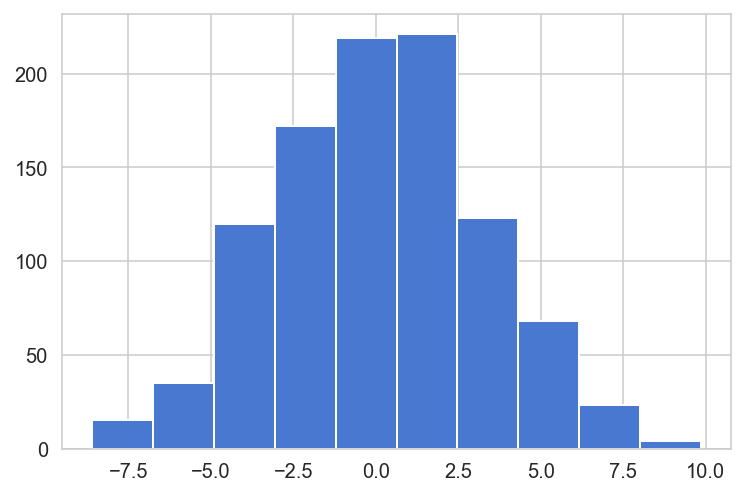

In [317]:
def make_normal (sample_size, scale, iterations):
    X = pd.DataFrame(dtype = int)
    for i in np.arange(iterations):
        X[i] = np.random.normal(size = sample_size, scale = scale)
    return X.mean()

normal = make_normal(1000,100, 1000)
p = plt.hist(normal)

#### Poisson Distribution

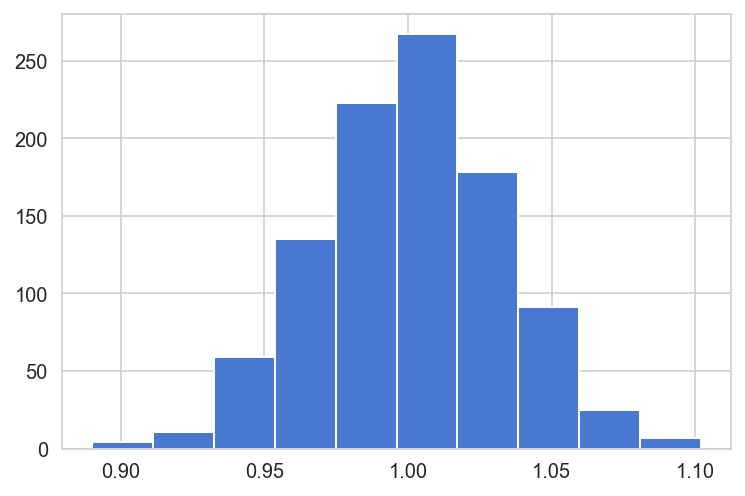

In [318]:
def make_poisson (sample_size, iterations):
    X = pd.DataFrame(dtype = int)
    for i in np.arange(iterations):
        X[i] = np.random.poisson(size = sample_size)
    return X.mean()

poisson = make_poisson(1000, 1000)
p = plt.hist(poisson)

#### Bernoulli Distribution

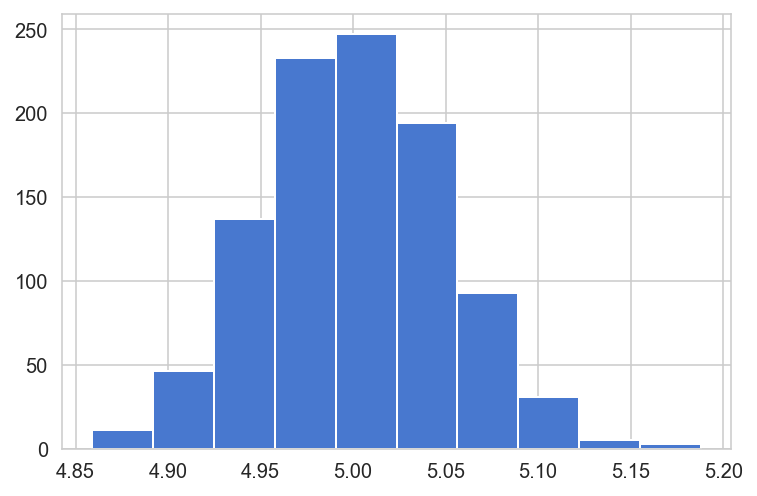

In [319]:
def make_bernoulli (sample_size, n, p , iterations):
    X = pd.DataFrame(dtype = int)
    for i in np.arange(iterations):
        X[i] = np.random.binomial(size = sample_size, p = p, n = n)
    return X.mean()

bernoulli = make_bernoulli(1000, 10, 0.5, 1000)
p = plt.hist(bernoulli)

#### Right-skewed Distribution

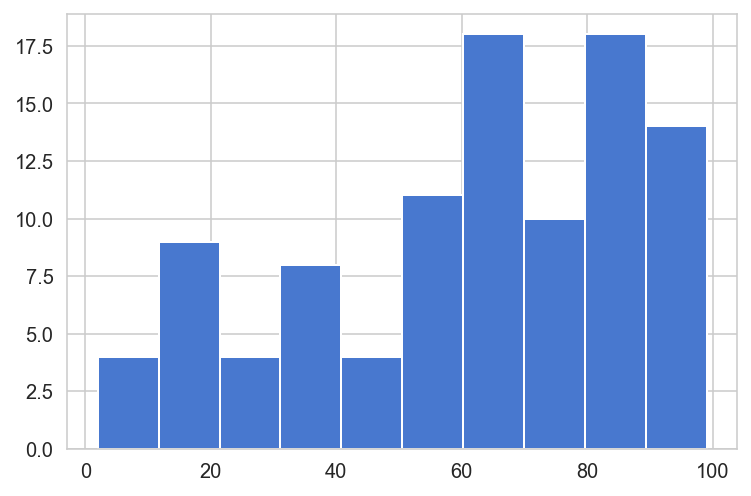

In [320]:
def make_right_skewed (sample_size, skew, iterations):
    
    X = pd.DataFrame(dtype = int)
    elements = np.arange(0,sample_size)
    prob = skew*(len(elements)-elements/2) + (elements/2)
    prob /= np.sum(prob)
    for i in np.arange(iterations):
        X[i] =  np.random.choice(elements, 1, p = prob)
    return X.mean()

right_skewed = make_right_skewed(1000,10, 1000)
p = plt.hist(skewed)

##### Left-skewed Distribution

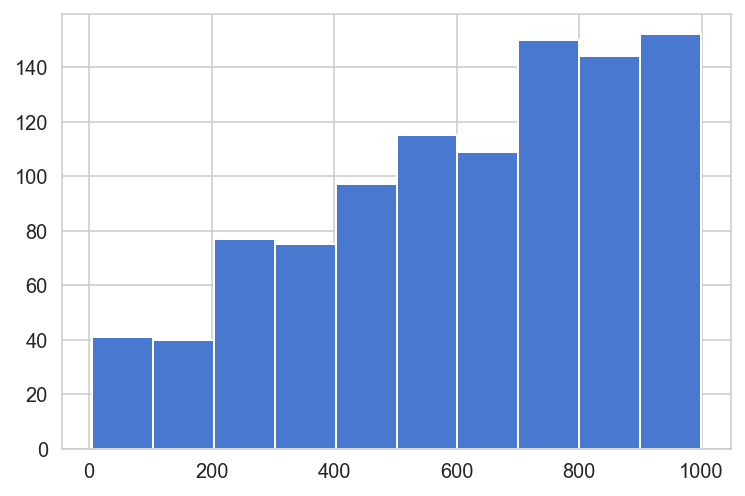

In [321]:
def make_left_skewed (sample_size, skew, iterations):
    
    X = pd.DataFrame(dtype = int)
    elements = np.arange(0,sample_size)
    prob = (len(elements)-elements/2) + skew*(elements/2)
    prob /= np.sum(prob)
    for i in np.arange(iterations):
        X[i] =  np.random.choice(elements, 1, p = prob)
    return X.mean()

left_skewed = make_left_skewed(1000,10, 1000)
p = plt.hist(left_skewed)

#### Make Laplace Distribution

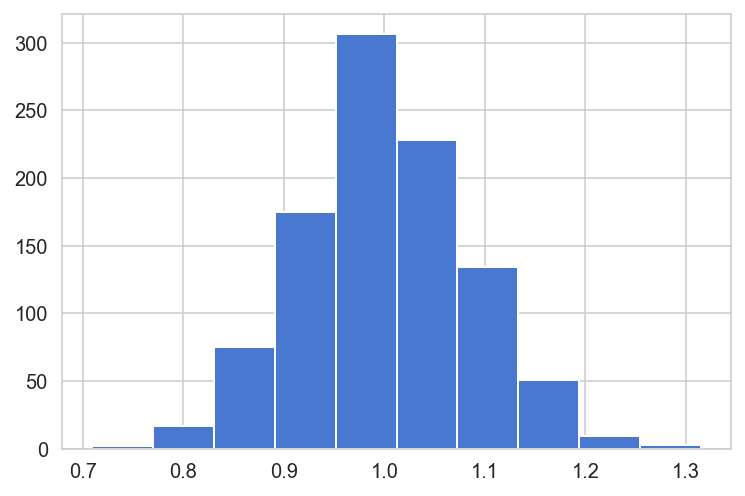

In [322]:
def make_laplace (sample_size, mean, scale, iterations):
    X = pd.DataFrame(dtype = int)
    for i in np.arange(iterations):
        X[i] =  np.random.laplace(size = sample_size,
                                  loc = mean, scale = scale)
    return X.mean()

laplace = make_laplace(1000,1, 2, 1000)
p = plt.hist(laplace)

#### Make dataframe of all distributions

,white_noise,normal,bernoulli,laplace,poisson,left_skewed,right_skewed
0,930.345610,1.729980,5.007,1.117371,0.966,534.0,189.0
1,624.480433,5.834312,4.963,1.136808,0.997,281.0,445.0
2,418.777529,6.281543,5.015,1.073633,0.997,705.0,707.0
3,352.324087,0.590280,5.022,0.924345,1.029,761.0,94.0
4,518.712800,0.301041,4.923,0.983332,1.049,915.0,0.0
...,...,...,...,...,...,...,...
995,638.373030,-3.588649,5.002,0.907651,1.031,475.0,838.0
996,382.637275,6.081275,5.015,1.013948,0.968,326.0,924.0
997,270.285125,2.704585,4.991,0.931175,1.002,770.0,520.0
998,368.015702,1.946280,4.980,0.934424,1.015,993.0,296.0


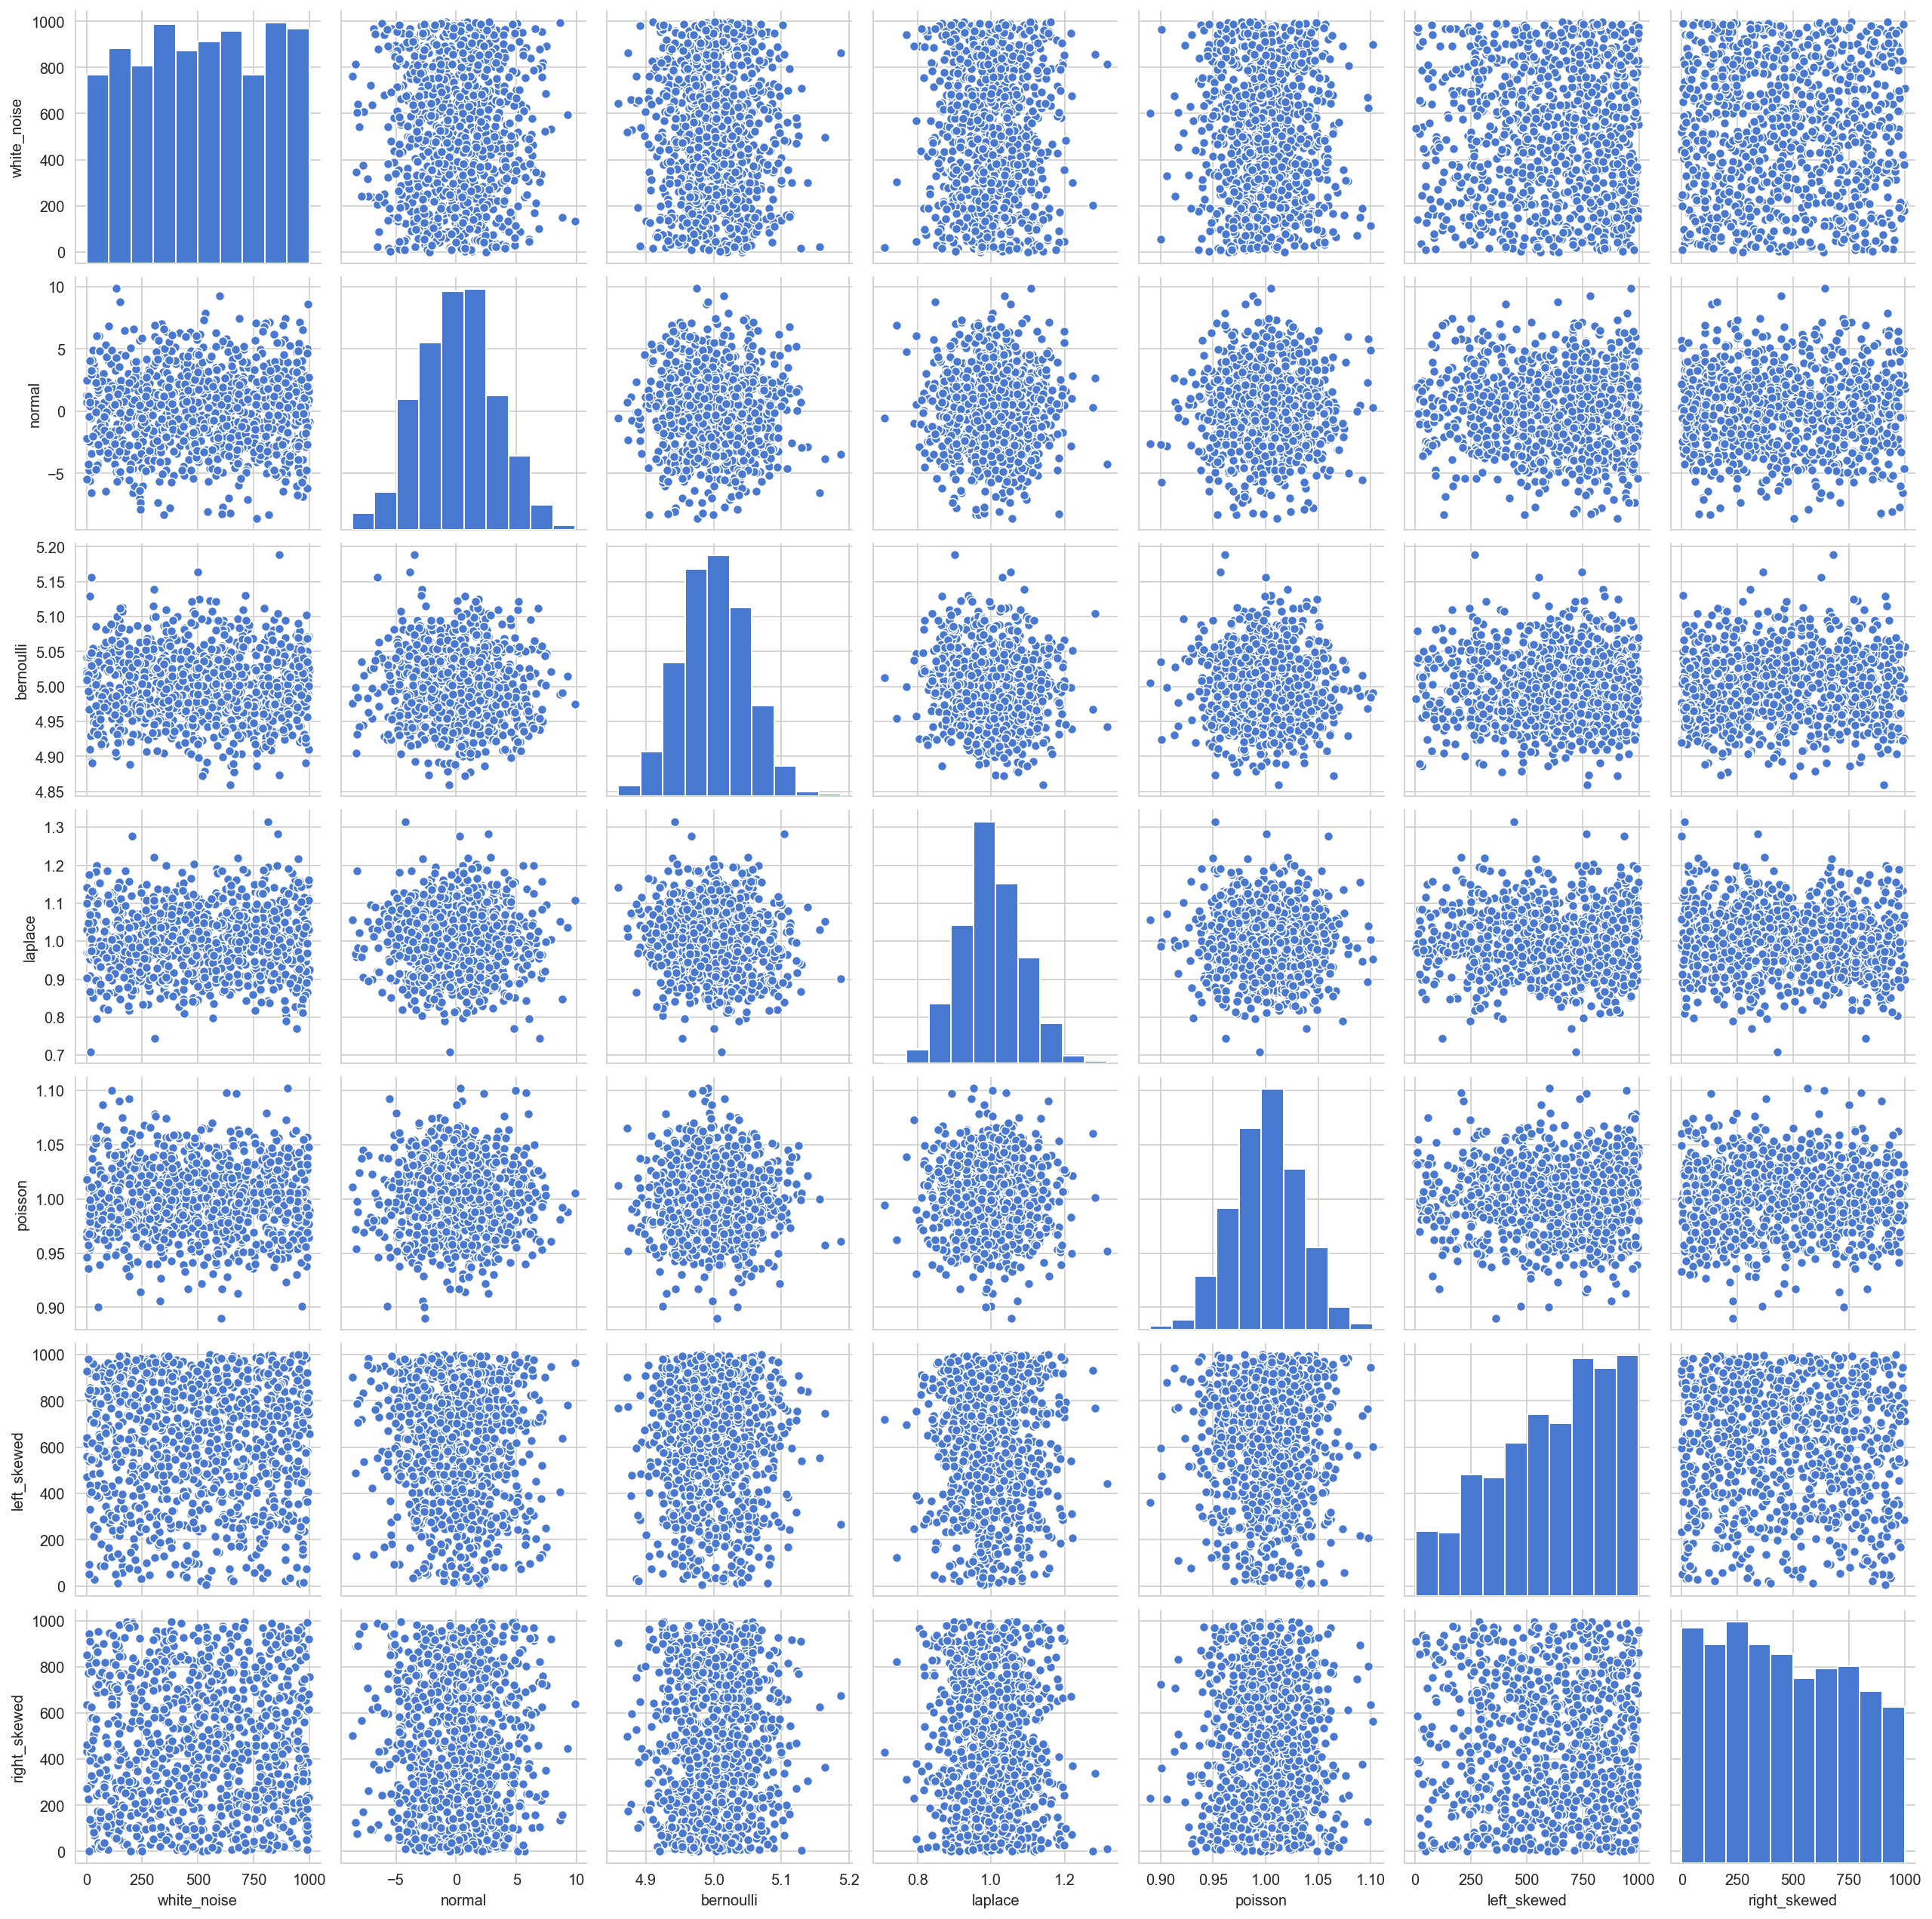

In [323]:
df_dist = pd.DataFrame({'white_noise': white_noise, 
                'normal':normal, 'bernoulli':bernoulli, 
                'laplace':laplace, 'poisson':poisson, 
                'left_skewed':left_skewed, 
                'right_skewed':right_skewed})
sns.pairplot(df_dist)
df_dist


#### Make Univariate Classification Dataset

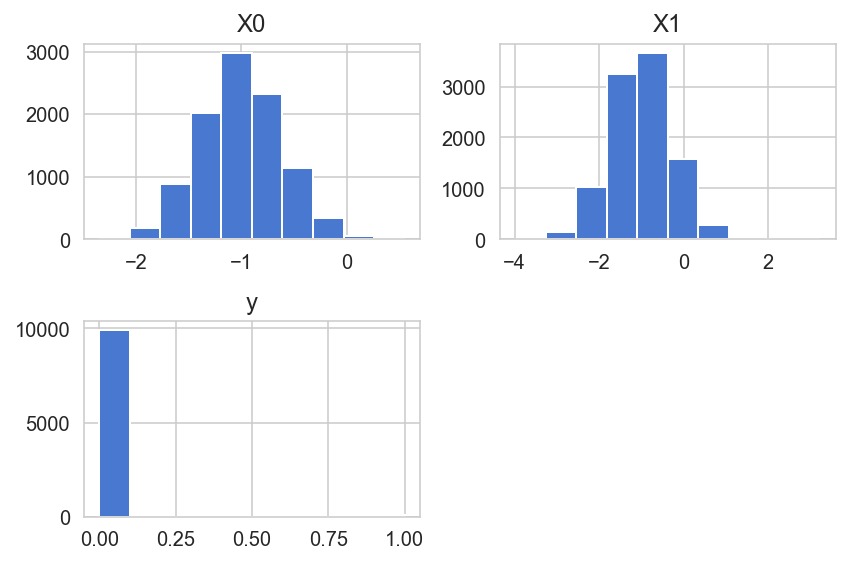

In [324]:
def make_univariate_classification ():
    from sklearn.datasets import make_classification
    #df_class1 = pd.DataFrame()
    X_class1, y_class1 = make_classification(n_samples=10000, n_features=2, 
            n_redundant=0, n_clusters_per_class=1, weights=[0.99], 
            flip_y=0, random_state=4)
    df_class1 = pd.DataFrame(X_class1)
    df_class1.columns = ['X' + str(c) for c in df_class1.columns.values]
    df_class1['y'] = y_class1
    df_class1.hist()
    plt.tight_layout()
    return df_class1

df_class1 = make_univariate_classification()

#### Make Multivariate Classification Dataset

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,Y0,Y1,Y2,Y3,Y4
0,1.0,2.0,5.0,1.0,1.0,3.0,0.0,5.0,1.0,1.0,...,3.0,2.0,3.0,3.0,2.0,0,0,1,0,0
1,3.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,0.0,...,0.0,1.0,4.0,6.0,3.0,1,1,1,1,1
2,1.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0,3.0,1.0,...,1.0,4.0,4.0,3.0,5.0,0,1,1,0,1
3,0.0,1.0,1.0,0.0,1.0,2.0,4.0,7.0,4.0,2.0,...,5.0,5.0,1.0,6.0,3.0,0,0,0,0,1
4,2.0,3.0,4.0,0.0,1.0,4.0,2.0,5.0,3.0,2.0,...,1.0,1.0,4.0,2.0,4.0,1,1,1,1,1


(100, 25)

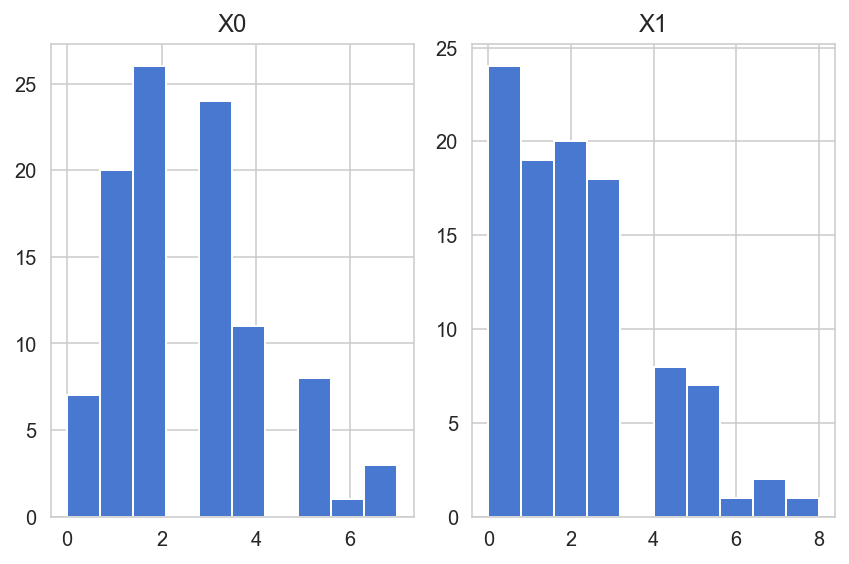

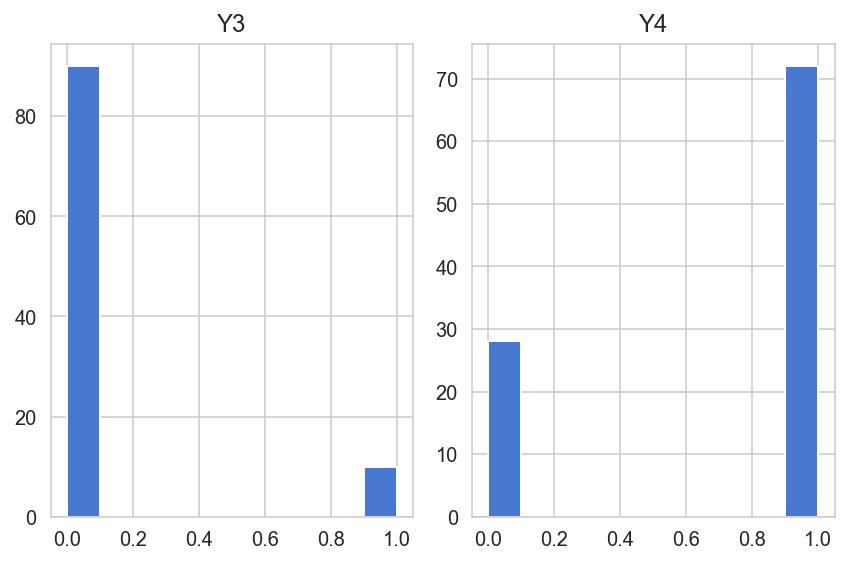

In [325]:
def make_multivariate_classification ():
    from sklearn.datasets import make_multilabel_classification
    X_class2, Y_class2 = make_multilabel_classification(n_classes=5, n_labels=3,
                                      allow_unlabeled=True,
                                      random_state=17)
    df_class2 = pd.DataFrame(X_class2)
    df_class2.columns = ['X' + str(c) for c in df_class2.columns.values]
    tmp = pd.DataFrame(Y_class2)
    tmp.columns = ["Y" + str(c) for c in tmp.columns.values]
    df_class2 = df_class2.join(tmp)
    display(df_class2.head())
    display(df_class2.shape)
    df_class2.iloc[:,:2].hist()
    plt.tight_layout()
    df_class2.iloc[:,-2:].hist()
    plt.tight_layout()
    return df_class2

df_class2 = make_multivariate_classification()

## Data Ingestion

#### Convert weird missing values to NaN

In [327]:
# If there are non-uniform NaN in a numeric dataset
df[c] = pd.to_numeric(df[c], errors='coerce')

#### Get duplicates

In [296]:
def get_duplicates (tmp):
    """Checks for duplicates in the data by 
    comparing the shape (rows)
    before and after drop_duplicates()"""
    orig_rows = tmp.shape[0]
    orig_cols = tmp.shape[1]
    drop_rows = tmp.drop_duplicates().shape[0]
    drop_cols = tmp.drop_duplicates().shape[1]
    
    print('Original has ' + str(orig_rows) + \
          ' rows and ' + str(orig_cols) + ' columns.')
    if drop_rows == orig_rows:
        print('There are no duplicates in the dataset.')
    else:
        print('There are ' + str(orig_rows - drop_rows) \
              + ' duplicate rows.')

get_duplicates(df_class1)

Original has 10000 rows and 3 columns.
There are no duplicates in the dataset.


#### Get Missing

In [297]:
def get_missing (tmp):
    """Gets the number of rows with missing values 
    and returns a dataframe containing only rows with 
    missing data for one or more features."""
    from IPython.display import HTML
    orig_rows = tmp.shape[0]
    orig_cols = tmp.shape[1]
    drop_rows = tmp.dropna().shape[0]
    drop_cols = tmp.dropna().shape[1]
    
    dfm = pd.DataFrame()
    print('Original has ' + str(orig_rows) + \
          ' rows and ' + str(orig_cols) + ' columns.')
    if drop_rows == orig_rows:
        print('There are no missing values in the dataset.')
    else:
        print('There are ' + str(orig_rows - drop_rows) \
              + ' rows with missing values.')
        for c in tmp.columns.values:
            tmp2 = pd.isnull(tmp[c])
            dfm = tmp[tmp2]
            if (dfm.empty == False):
                print('Number of missing values in col ' \
                      + c + ': ', dfm.shape[0])
                display(HTML(dfm.head().to_html()))
    return dfm

df_missing = get_missing(df_class1)

Original has 10000 rows and 3 columns.
There are no missing values in the dataset.


## Transformations

#### Skewedness

X0    0.683011
X1    0.867807
X2    0.450289
X3    0.842042
X4    1.536231
dtype: float64

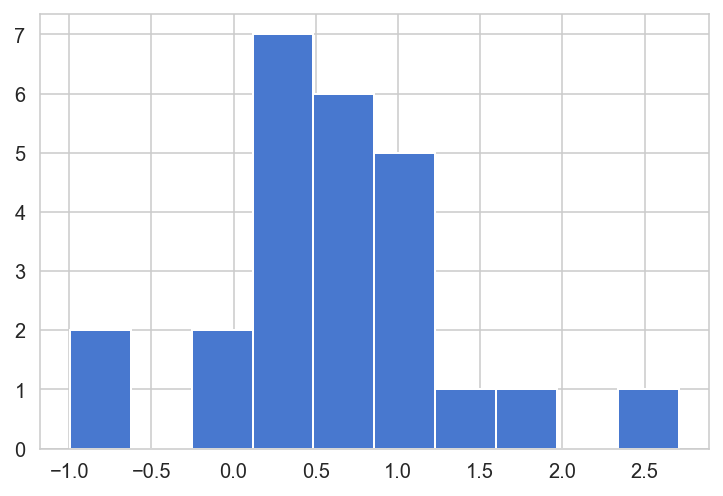

In [328]:
def get_skewedness(tmp):
    df_skew = tmp.skew(axis=None, skipna=None, level=None, numeric_only=None)
    return df_skew

df_skew = get_skewedness(df_class2)
display(df_skew.head())
df_skew.hist()


#### Min-Max normalization

#### z-score normalization

#### Square-Root transformation

#### Square transformation

#### cube root transformation

#### Log transformation

## Imbalanced Data

#### Get Class Weights

In [468]:
def get_class_weights():
    import collections
    counter = collections.Counter(df_class1[:-1])
    print(counter)

Counter({'X0': 1, 'X1': 1, 'y': 1})


#### SMOTE

In [ ]:
def simple_smote():
    X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_sample(X_train, y_train)
    y_train_upsample.mean()

## Datetime

#### Pandas datetime column

In [12]:
def convert_df_utc (tmp, cols):
    """Converts a column to YY-MM-DD format. 
    Input is a dataframe and the columns that 
    need to be converted to datetime. Returns
    the reformatted dataframe."""
    for c in cols:
        tmp[c] = pd.to_datetime(tmp[c], 
                format = "%Y-%m-%d", 
                errors = 'ignore')
    return tmp

In [ ]:
def format_datetime():
    df[c] = pd.to_datetime(df[c], format = "%Y-%m-%d %H:%M:%S", errors = 'ignore')

#### Single datetime UTC to YY-MM-DD format

In [14]:
from datetime import datetime as dt

In [15]:
def convert_single_utc (tmp):
    tmp = dt.utcfromtimestamp((tmp/1000)).strftime('%Y-%m-%d')
    return tmp

## Imputation

#### Simple imputer

In [ ]:
def simple_imputer():
    from sklearn.impute import SimpleImputer

    imp = SimpleImputer(missing_values=np.nan, strategy='median')
    imp = imp.fit(df[num_cols])
    df[num_cols] = np.round(imp.transform(df[num_cols]))
    display(HTML(df.head().to_html()))

#### Interpolation

In [ ]:
def interpolation():
    df = df.copy()
    dfw = pd.DataFrame()


    for c in df.columns.values:
        fig, ax  = plt.subplots(1,1, figsize = (15,3))

        # Trim starting NAs
        for i, v in enumerate(df[c]):
            if np.isnan(v) == False:
                df2 = df.iloc[i:,:]
                break
        resample = df2[c].resample('M')
        dfw[c + '_downsampled'] = resample.mean()
        dfw[c + '_interpolated'] = dfw[c + '_downsampled'].interpolate\
            (method='time')
        ax.plot(dfw.index, dfw[c + '_interpolated'], 
              label = c, color = 'blue', alpha = 0.8)
        ax.plot(dfw.index, dfw[c + '_downsampled'], label = c, 
                alpha = 0.5, color = 'red')
        ax.set_ylim(0,50)
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles,labels)
    dfw.head()

## Correlations

In [17]:
linear_corr = df.corr(method = 'pearson')[c]

In [ ]:
paired_corr = df.corr(method = 'spearman')[c] 

In [ ]:
nonlinear_corr = df.corr(method = 'kendall')[c]

In [ ]:
sorted_corr = np.argsort(np.abs(linear_corr))[c]

#### Correlation Heatmap

In [26]:
def visualize_corr(tmp):
    """Plot dataframe's correlation heatmap with annotations. 
    Input is a dataframe. Returns the figure."""
    
    fig, ax = plt.subplots(figsize = (14,12))
    sns.heatmap(tmp.corr(), cmap = 'Blues', annot = True)
    plt.tight_layout()
    plt.show()
    return fig

## Plotting

In [9]:
def plot_format ():
    """Returns a dict with default plot format options for markers, custom cmap,
    and fontsizes (tick, axis, title)"""
    
    plot_format = dict()
    plot_format['markers'] = ['s', 'o', 'v', '^','*', 'X', 'p','D','<', '>']
    plot_format['cmap'] = ['blue', 'darkcyan','rebeccapurple', 'red', 'orange', 'green', 
         'darkmagenta', 'darkslateblue', 'lightcoral', 'sandybrown']
    plot_format['tick'] = 14
    plot_format['axis'] = 18
    plot_format['title'] = 20
    return plot_format

#### Visualize histograms

In [19]:
def visualize_hist (tmp):
    """Plot a custom histogram panel of all features. 
    Input is a dataframe. Returns the figure. """
    
    panels = len(tmp.columns.values)
    cols = 3
    rows = round(panels/cols) 
    if panels % (cols) != 0:
        rows += 1
    fig, ax = plt.subplots(rows, cols, figsize = (rows*4,rows*8))
    i = 0
    j = 0
    for c in tmp.columns.values:
        ax[i][j].hist(tmp[c], label = c, edgecolor = 'dimgray')
        ax[i][j].set_title ('\n' + c + '\n', fontsize = 20)
        ax[i][j].tick_params (labelsize = 18)
        if j == cols-1:
            j = -1
            i += 1
        j += 1
    print ('waiting on plot...')
    plt.tight_layout()
    plt.show()
    return fig

#### Visualize Bar Graphs

In [18]:
def visualize_bar(tmp, x):
    """Plot a custom panel of vertical bar plots 
    for all features in a dataset. Input is a 
    dataframe and a column for the x axis. 
    Returns the figure."""
    
    panels = len(tmp.columns.values)
    cols = 3
    rows = round(panels/cols) 
    if panels % (cols) != 0:
        rows += 1
    fig, ax = plt.subplots(rows, cols, 
              figsize = (rows*4,rows*8))
    i = 0
    j = 0
    for c in tmp.columns.values:
        ax[i][j].bar(tmp[x], tmp[c])
        ax[i][j].set_title ('\n' + c + '\n', fontsize = 18)
        ax[i][j].tick_params (labelsize = 16)
        ax[i][j].set_xlabel (x, fontsize = 18)
        ax[i][j].set_ylabel (c, fontsize = 18)
        if j == cols-1:
            j = -1
            i += 1
        j += 1
    print ('waiting on plot')
    plt.tight_layout()
    plt.show()
    return fig

#### Visualize Scatter

In [ ]:
def visualize_scatter (tmp, x):
    """Custom panel of scatterplots for all features. 
    Input is a dataframe and the column for the x axis.
    Returns the figure."""
    
    panels = len(tmp.columns.values)
    cols = 3
    rows = round(panels/cols) 
    if panels % (cols) != 0:
        rows += 1
    fig, ax = plt.subplots(rows, cols, figsize = (rows*4,rows*8))
    i = 0
    j = 0
    for c in tmp.columns.values:
        ax[i][j].scatter(tmp[x], tmp[c], label = c, 
                 edgecolor = 'dimgray', alpha = 0.2, 
                 s = 75, cmap = 'rainbow')
        ax[i][j].set_title ('\n' + c + '\n', fontsize = 18)
        ax[i][j].tick_params (labelsize = 16)
        ax[i][j].set_xlabel (x, fontsize = 18)
        ax[i][j].set_ylabel (c, fontsize = 18)
        if j == cols-1:
            j = -1
            i += 1
        j += 1
    print ('waiting on plot')
    plt.tight_layout()
    plt.show()
    return fig

#### Confusion Matrix Plot

In [22]:
def visualize_confusion (cnf):
    """Plot the confusion matrix as a heatmap with annotations. 
    Input is a confusion matrix. Returns nothing."""
    fig, ax = plt.subplots(figsize = (4,4))
    sns.heatmap(pd.DataFrame(cnf), annot = True, cmap = 'Purples', 
            fmt = 'g', annot_kws={"size":16})
    ax.set_xlabel ("Predicted Value", fontsize = 18)
    ax.set_ylabel ("Actual Value", fontsize = 18)
    ax.tick_params (labelsize = 14)
    plt.tight_layout()
    plt.show()

#### Visualize US Location

In [ ]:
def plot_map(df):
    """Plot location data on a map of the US. Remove '[world.name == 'United States
    of America']' from the plotting function to see the entire world map or change
    the world.name to some other country of interest. Input is a dataframe. 
    Returns nothing."""
    
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    tmp = df[df.long.astype(float) < 0]
    gdf = gpd.GeoDataFrame(
        tmp, geometry=gpd.points_from_xy(tmp.long, tmp.lat))
    ax = world[world.name == 'United States of America'].plot(
        color='wheat', edgecolor='black', figsize = (20,20),alpha = 0.5)
    gdf.plot(ax=ax, marker = 'o', markersize = 20, color = 'magenta', alpha = 0.025)

#### Pie Chart

In [ ]:
def pychart():
    import matplotlib.pyplot as plt

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    #labels = 'Active', 'At-Risk', 'Inactive'
    labels = '','',''
    sizes = [68.7, 27, 4.3]
    explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors = ['plum', 'wheat', 'turquoise'],
           textprops={'fontsize': 14, 'color': 'darkslategray'})
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

#### Nice premade grid plot of distributions

In [ ]:
sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

#### ROC curve

#### Cross-Validation

## Statistical Tests

#### Shapiro-Wilk test for normality

In [27]:
def sw_normality(tmp):
    """Wrapper for scipy implementation of the shapiro-wilk 
    test for normality with an alpha of 0.5. Input is a dataframe.
    Returns nothing."""
    
    from scipy.stats import shapiro
    cols = []
    for c in tmp.columns.values:
        cols.append(c)
        stat, p = shapiro(tmp[c].dropna())
        print(c, end = ': ')
        print('Statistics = %.3f, p = %.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('Sample does not look Gaussian (reject H0)\n')

#### Power Analysis

In [35]:
def power_analysis (baseline_rate, practical_significance,
    confidence_level, sensitivity, ratio):
    """Uses the statsmodels implementation of proportion
    effects size and normal independent power analysis.
    input is baseline_rate, practical significance (0.01), 
    confidence level (0.05), sensitivity (0.8), and 
    balance ratio (class weight ratio). 
    Returns minimum sample size."""
    
    import statsmodels.api as sm
    import statsmodels.stats.power as smso
    effect_size = sm.stats.proportion_effectsize(baseline_rate, 
              baseline_rate + practical_significance)
    sample_size = smso.NormalIndPower().solve_power(effect_size = effect_size, 
             power = sensitivity, alpha = confidence_level, ratio=1/3)
    print("Minimum sample size per group: {} samples".format(int(sample_size)))
    return sample_size

#### Independent t-test

In [553]:
def t_test():
    from scipy.stats import ttest_ind
    stat, p_val = ttest,pval = ttest_ind(df_class1.iloc[:,0],df_class1.iloc[:,1])
    print("p-value: {}, t: {}".format(p_val, stat))
    if pval <0.05:
      print("Reject null hypothesis")
    else:
      print("Accept null hypothesis")

p-value: 0.04290166467972046, t: -2.0247951473897574
Reject null hypothesis


#### Z-test

In [557]:
def z_test():
    from statsmodels.stats.weightstats import ztest
    stat, p_val = ttest,pval = ztest(df_class1.iloc[:,0],df_class1.iloc[:,1])
    print("p-value: {}, t: {}".format(p_val, stat))
    if pval <0.05:
      print("Reject null hypothesis")
    else:
      print("Accept null hypothesis")

p-value: 0.04288840357437305, t: -2.0247951473897574
Reject null hypothesis


## Scaling and Normalization

#### Log Scaler for Skewed Data

In [36]:
def log_scaler (tmp, cols):
    """Rescales the data to a log scale. Input
    is a dataframe and columns to be log-scaled. 
    Returns a log-scaled dataframe."""
    
    for c in cols: # any 0 values need to be converted to 1
        tmp[c] = np.where (tmp[c] <= 0, 1, tmp[c])
    tmp = tmp[cols].apply(np.log, axis = 1).round(3)
    return tmp

#### Standard Scaler

In [38]:
def standard_scaler (tmp):
    """Uses the scikitlearn implementation of the
    StandardScaler to scale the data. Input is a 
    dataframe. Returns the scaled dataframe."""
    
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled = scaler.fit_transform(tmp)
    tmp_scaled = pd.DataFrame(scaled, index = tmp.index, columns = tmp.columns)
    fig = visualize_data(tmp_scaled)
    return tmp_scaled

## Make Training and Test Sets

#### Shuffle Split

In [39]:
def shuffle_split (tmp, X_cols, y_col):
    """Wrapper for sklearn shuffle split. Input is a 
    dataframe, a list of columns for training, and the 
    column name of the labeled data. Returns
    X_train, y_train, X_test, y_test."""

    from sklearn.model_selection import ShuffleSplit
    split = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 17)
    for train_index, test_index in split.split(tmp[X_cols], tmp[y_col]):
        train = tmp.iloc[train_index][:]
        test = tmp.iloc[test_index][:]
    
    y_train = train[y_col]
    X_train = train.drop(y_col, axis = 1)
    y_test = test[y_col]
    X_test = test.drop(y_col, axis = 1)
    print(X_train.shape, X_test.shape)
    return X_train, X_test, y_train, y_test


#### Stratified k-fold

In [485]:
def stratified_kfold():
    from sklearn.model_selection import KFold
    kfr = KFold(n_splits = 5, random_state = 17, shuffle = True)
    kf = KFold(n_splits = 5)
    # pass kf to the cv parameter in cross-validation
    # Ensures same splits every time

#### Stratified Shuffle Split

In [2]:
def stratified_shuffle_split (tmp, X_cols, y_col):
    """Wrapper for the sklearn stratified shuffle split method. 
    Input is a dataframe, columns to be trained, and a label
    column. Returns X_train, X_test, y_train, and y_test."""
    
    from sklearn.model_selection import StratifiedShuffleSplit
    split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 17)
    for train_index, test_index in split.split(tmp[X_cols], tmp[y_col]):
    train = tmp.iloc[train_index][:]
    test = tmp.iloc[test_index][:]
    
    y_train = train[y_col]
    X_train = train.drop(y_col, axis = 1)
    y_test = test[y_col]
    X_test = test.drop(y_col, axis = 1)
    print(X_train.shape, X_test.shape)
    return X_train, X_test, y_train, y_test
    

#### Train Test Split

In [493]:
def train_test_split():
    from sklearn.model_selection import train_test_split
    X, y = df_class1.iloc[:,:-1], df_class1.iloc[:,-1:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
            random_state=17, shuffle = True, 
            test_size=0.33, stratify = y)

#### Split picker

## Metrics

#### Classification Metrics

In [ ]:
def classification_metrics (y_test, predictions):
    """Wrapper for sklearn's metrics report. Input
    is the test labels and predictions. Returns the 
    metrics report."""
    from sklearn import metrics
    
    report = metrics.classification_report(y_test, predictions, digits = 3)
    cnf = metrics.confusion_matrix (y_test, predictions)
    
    fig, ax = plt.subplots(figsize = (8,8))
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'g', annot_kws={"size":16})
    ax.set_xlabel ("Predicted Value", fontsize = 18)
    ax.set_ylabel ("Acutal Value", fontsize = 18)
    ax.tick_params (labelsize = 14)
    plt.tight_layout()

    return cnf_matrix, metrics_report

#### Confusion Matrix

In [ ]:
def confusion_matrix (y_test, predictions):
    """Wrapper for sklearn's confusion matrix function. 
    Input is y_test and predictions. Returns the confusion
    matrix."""
    
    from sklearn import metrics
    cnf = metrics.confusion_matrix (y_test, predictions)
    return cnf

#### Correlation matrix

In [ ]:
def correlation_matrix():
    corr_matrix = train_set.corr()
    sns.set()
    fig, ax = plt.subplots(figsize=(9,6), dpi = 300)
    corr_map = sns.heatmap(corr_matrix,  annot = True, ax=ax, cmap = "viridis")

#### Classification metrics

In [475]:
def get_classification_metrics ():
    classification_metrics = ['accuracy', 'precision','f1', 
                'f1_samples', 'neg_log_loss', 'recall', 
                'jaccard', 'f1_weighted','neg_brier_score', 
                'roc_auc']
    return classification_metrics

#### Clustering Metrics

In [425]:
def get_clustering_metrics():
    clustering_metrics = ['adjusted_mutual_info_s-score', 
            'adjusted_rand_score', 'completeness_score', 
            'fowlkes_mallows_score', 'homogeneity_score',
            'mutual_info_score', 'normalized_mutual_info_s-score', 
            'v_measure_score']
    return clustering_metrics

#### Regression Metrics

In [439]:
def get_regression_metrics():
    regression_metrics = ['explained_variance', 'max_error', 
            'neg_mean_absolute_error', 'neg_mean_squared_error', 
            'neg_root_mean_squared_error', 
            'neg_median_absolute_error', 'r2', 'neg_mean_poisson_deviance', 
            'neg_mean_gamma_deviance']
    return regression_metrics

## Linear Regression

#### CV for linear regression (no parameters)

In [565]:
def get_cv_scores(model):
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
    
get_cv_scores (ln_model)

CV Mean:  0.1729999456430596
STD:  0.039298015019591744




#### Simple linear regression

In [562]:
def linear_regression(X_train, y_train):
    from sklearn.linear_model import LinearRegression
    
    model = LinearRegression(fit_intercept = True,
        normalize = False,copy_X = True, n_jobs = -1)
    ln = model.fit (X_train, y_train)
    score = ln.score(X, y)
    coeff = ln.coef_
    b = ln.intercept_
    #predictions = reg.predict(y_test)
    #return predictions, score, coeff, intercept
    return score, coeff, b, ln

#predictions, parameters = linear_regression()
#predictions, score, coeff, intercept = linear_regression (df_class1.iloc[:,:-1], df_class1.iloc[:,-1:])
ln_score, ln_coeff, ln_b, ln_model = linear_regression (df_class1.iloc[:,:-1], df_class1.iloc[:,-1:])

#### L1 Lasso Regression

In [570]:
def lasso_cv():
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha=1).fit(X_train, y_train)
    get_cv_scores(lasso)

CV Mean:  -3.908938998922196e-05
STD:  1.9691926254492047e-05




#### L! Lasso Regression with CV

In [572]:
def lasso_grid():
    alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid = dict(alpha=alpha)
    grid = GridSearchCV(estimator=lasso, param_grid=param_grid, 
                        scoring='r2', verbose=1)
    grid_result = grid.fit(X_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.16993448267770556
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


#### L2 Ridge Regression

In [566]:
def ridge_cv():    
    from sklearn.linear_model import Ridge
    # Train model with default alpha=1
    ridge = Ridge(alpha=1).fit(X_train, y_train)
    # get cross val scores
    get_cv_scores(ridge)

CV Mean:  0.17300251389316137
STD:  0.03920791170256422




#### L2 Ridge Regression with CV

In [568]:
def ridge_grid():
    alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid = dict(alpha=alpha)
    grid = GridSearchCV(estimator=ridge, 
                        param_grid=param_grid, 
                        scoring='r2', verbose=1)
    grid_result = grid.fit(X_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.17300251389316137
Best Params:  {'alpha': 1}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.1s finished


## Classification

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = linear_model.LogisticRegression()

#### Random Forest

In [41]:
def random_forest (X_train, y_train, class_weight, n_trees):
    """Wrapper for the sklearn random forest. For the class
    weight, either pass a dict (dict({0,1,3})) with the
    ratio of class weights or 'balanced' if the data is 
    balanced. Input is the training data, labels, class 
    weights and number of estimators. Returns predictions
    and a dataframe of ordered feature importances."""
    
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_jobs = -1, 
            class_weight = class_weight,
            bootstrap = True,
            n_estimators = 100,
            oob_score = True,
            random_state = 17)
    model_fit = model.fit(np.array(X_train), y_train)
    predictions = model_fit.predict(X_test)
    importances = model_fit.feature_importances_
    dfi = pd.DataFrame(importances, index = X_train.columns, 
        columns = ['Importance']).sort_values('Importance', 
        ascending = False)
    return predictions, dfi

#### MultiLayer Perceptron

In [42]:
def perceptron (X_train, y_train, layers):
    """Wrapper for sklearn's multilayer perceptron. Input
    is training data, training labels, and the number of layers.
    Returns predictions"""
    
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier(hidden_layer_sizes = 100)
    model_fit = model.fit(np.array(X_train), y_train)
    predictions = model_fit.predict(X_test)
    return predictions

#### Gradient Boost

In [ ]:
def gradient_boost():
    model = GradientBoostingClassifier(ccp_alpha=0.0, 
                criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                n_iter_no_change=None, presort='deprecated',
                random_state=17, subsample=1.0, tol=0.0001,
                validation_fraction=0.1, verbose=0,
                warm_start=False)
    gb = model.fit(X_train, y_train)
    predictions = gb.predict(X_test)
    score = gb.score(X_test, y_test)

#### XGBoost

In [ ]:
def xg_boost():
    model = XGBClassifier(max_delta_step = 10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

## Clustering

#### K-Nearest Neighbors

#### DBSCAN

In [ ]:
def dbscan():
    from sklearn.cluster import DBSCAN
    from sklearn import metrics

    # Compute DBSCAN
    db = DBSCAN(eps=5, min_samples=10).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(n_clusters_)
    print(n_noise_)

#### Plot DBSCAN results

In [ ]:
def dbscan_plot():
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = df[class_member_mask & core_samples_mask]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = df[class_member_mask & ~core_samples_mask]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

#### Elbow method for K-Means clustering

In [45]:
def elbow_kmeans (X_train, min_k, max_k):
    """Plots an elbow graph to determine the optimal
    value of k for K-Means clustering. Input is a training set,
    a minimum k value, and a maximum k value. Returns nothing."""
    
    from sklearn.cluster import KMeans
    if len(X_train.columns.values) == 1:
        X = np.array(X_train).reshape(-1, 1)
    elbow = {}
    for k in np.arange(min_k, max_k):
        model = KMeans (n_clusters = k, max_iter = 1000)
        k_means = model.fit(X)
        elbow[k] = k_means.inertia_

    fig, ax = plt.subplots(1,1, figsize = (8,8))
    ax.plot(list(elbow.keys()), list(elbow.values()), 
            marker = 'o', ms = 10, mec = 'dimgray', lw = 4)
    ax.set_xlabel ('\n K values', fontsize = 20)
    ax.set_ylabel ('Sum of Squares Error\n', fontsize = 20) 
    ax.set_title('\nElbow Method for determining K\n', fontsize = 20)
    ax.tick_params(labelsize = 18)
    plt.show()

#### K-Means clustering

In [ ]:
def kmeans (X_train, k):
    """Wrapper for sklearn's KMeans clustering alg. Input
    is a training set and number of clusters. Returns cluster 
    assignments for each row in the training set."""
    
    from sklearn.cluster import KMeans
    if len(X_train.columns.values) == 1:
        X = np.array(X_train).reshape(-1, 1)
    model = KMeans (n_clusters = k, max_iter = 1000)
    k_means = model.fit (X_train)
    clusters = k_means.predict(X)
    return clusters

#### Dendrogram for hierarchical clustering

In [ ]:
def dendrogram (X_train, method):
    """Wrapper for the scipy hierarchical clustering 
    dendrogram. Inputs are a training set and a 
    clustering method (i.e.'ward')."""
    
    import scipy.cluster.hierarchy as shc
    plt.figure(figsize = (10,8))
    plt.title ("Dendrogram")
    dend = shc.dendrogram(shc.linkage(X_train, method = method))

#### Agglomerative Heirarchical Clustering

In [ ]:
def agglomerative (X_train, linkage, k):
    """Wrapper for sklearn's agglomerative clustering
    algorithm. Uses the euclidian affinity by default. Inputs
    are training data, a linkage method, and number of clusters. 
    Returns cluster assignments for each row in the training set."""
    
    from sklearn.cluster import AgglomerativeClustering
    model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
    clusters = model.fit_predict(X_train)
    return clusters

#### Silhouette score

## Hyperparameter Tuning

#### Grid Search CV

In [494]:

def grid_search (model, params, metrics, X_train, y_train, k):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.svm import SVC
    """Wrapper for sklearn's grid search. Input is a
    model, a list of parameters, list of metrics, and a
    predefined splitter. Returns a dataframe with
    the grid search results."""
    
    grid = GridSearchCV(model, params,
                     return_train_score = True, 
                     scoring = metrics, cv = k)
    grid_fit = grid.fit(X_train, y_train)
    tmp = pd.DataFrame(grid.cv_results_)
    best_params = pd.DataFrame.from_dict(grid.best_estimator_.get_params())
    return tmp, best_params



In [ ]:
def xgboost_params():
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    parameters = {'learning_rate': [0.01,0.02,0.03],
                      'subsample'    : [0.9, 0.5, 0.2],
                      'n_estimators' : [100,500,1000],
                      'max_depth'    : [4,6,8]
                     }
    metrics = 'recall'
    #grid_search (model, parameters, metrics, df_class1.iloc[:100,:-1], np.ravel(df_class1.iloc[:100,-1:]), 2)

#### GradientBoostingClassifier hyperparameters

In [ ]:
def gradient_boost_params():
    parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

#### RandomForest hyperparameters

In [ ]:
def random_forest_params():
    parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
    }

#### Logistic Regression hyperparameters

## Cross-Validation

#### Cross-Validation

In [464]:
def cross_validation (model, X_train, y_train, k):
    """Wrapper for sklearn's cross-validation method. Input is a 
    trained model, the test data, the test labels, a splitter, and
    a list of metrics. Returns a dict with the results."""
    from sklearn.model_selection import cross_validate
    from sklearn.model_selection import cross_val_score
    
    cv = cross_validate(model, X_train, y_train, 
                        cv = k,  
                        return_train_score = False, 
                        scoring = 'r2')
    
    print('mean r2: ', np.mean(cv['test_score']))
    print('STD: ', np.std(cv['test_score']))
    print('\n')
    df_cv = pd.DataFrame.from_dict(cv)
    df_cv = df_cv.reset_index()
    
    df_cv.columns.values[0] = 'split'
    return df_cv
              
df_cv = cross_validation (ln_model, df_class1.iloc[:,:-1], df_class1.iloc[:,-1:], 5)
df_cv

mean r2:  0.1761614162635385
STD:  0.037690408084234496




,split,fit_time,score_time,test_score
0,0,0.006233,0.003556,0.180874
1,1,0.005012,0.003290,0.103239
2,2,0.004937,0.003163,0.209876
3,3,0.004182,0.002768,0.197362
4,4,0.004221,0.002908,0.189457


#### SMOTE with Cross Validation

In [541]:
def smote_cv():
    from sklearn.pipeline import Pipeline, make_pipeline
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import StratifiedKFold

    X = np.array(df_class1.iloc[:,:-1])
    y = np.array(df_class1.iloc[:,-1:])

    n_splits = 10
    n_measures = 2 #Recall and AUC
    kf = StratifiedKFold(n_splits=n_splits) #Stratified because we need balanced samples
    kf.get_n_splits(X,np.ravel(y))

    for fold, (train_index, test_index) in enumerate(kf.split(X, y),1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        sm = SMOTE(k_neighbors = 5, n_jobs = -1)
        X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
        model = RandomForestClassifier (n_jobs = -1, 
                bootstrap = True,
                n_estimators = 100,
                oob_score = True,
                random_state = 17)
        model.fit(X_train_oversampled, y_train_oversampled )  
        y_pred = model.predict(X_test)
        print(f'For fold {fold}:')
        print(f'Accuracy: {model.score(X_test, y_test)}')
        #print(f'f-score: {model.f1_score(y_test, y_pred)}')

For fold 1:
Accuracy: 0.964
For fold 2:
Accuracy: 0.963
For fold 3:
Accuracy: 0.962
For fold 4:
Accuracy: 0.968
For fold 5:
Accuracy: 0.961
For fold 6:
Accuracy: 0.963
For fold 7:
Accuracy: 0.964
For fold 8:
Accuracy: 0.958
For fold 9:
Accuracy: 0.96
For fold 10:
Accuracy: 0.962


In [547]:
def smote_grid():
    from sklearn.pipeline import Pipeline, make_pipeline
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import GridSearchCV

    X = np.array(df_class1.iloc[:,:-1])
    y = np.ravel(df_class1.iloc[:,-1:])
    n_splits = 10
    n_measures = 2 #Recall and AUC
    kf = StratifiedKFold(n_splits=n_splits) #Stratified because we need balanced samples
    kf.get_n_splits(X,np.ravel(y))
    params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [4, 6, 10, 12],
        'random_state': [13]
    }

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    sm = SMOTE(k_neighbors = 5, n_jobs = -1)
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
    model = RandomForestClassifier (
            bootstrap = True,
            n_estimators = 100,
            oob_score = True,
            random_state = 17)
    grid_smote = GridSearchCV(model, 
            param_grid = params, cv=kf, 
            scoring='recall', return_train_score=True)
    grid_smote.fit(X_train, y_train)
    grid_smote.best_params_

{'max_depth': 10, 'n_estimators': 50, 'random_state': 13}

## Segmentation

#### RFM Segmentation - Recency, Frequency, Monetary

#### Rank data by quartering the histogram

In [46]:
def rank_data (tmp, n_bins):
    """Bin the population for each feature and assign a rank.
    Input is a training set and the number of bins to divide 
    the samples. Returns a dataframe with rankings in place of
    original values."""
    
    score_labels = []
    for i in np.arange (0, n_bins):
        score_labels.append (str(i+1))
    tmp2 = pd.DataFrame()
    for c in tmp.columns.values:
        try:
            tmp2[c] = pd.qcut(tmp[c], 
                q = n_bin, labels = score_labels, 
                duplicates = 'drop').astype(int)
        except:
            continue
    return tmp2

#### Visualize Segments

In [ ]:
def visualize_segments (tmp):
    """Takes a dataframe grouped by cluster number (or segment number)
    and plots it vs mean rank, score or value of a feature column"""
    fig, ax = plt.subplots (1,1, figsize = (8,5))
    
    for i, c in enumerate(dfg.columns.values):
    ax.scatter (dfg.index, dfg[c], s = 120, ec = 'k', alpha = 0.5, label = c, cmap = 'rainbow', marker = markers[i])
    ax.set_xlabel('Cluster', fontsize = 16)
    ax.set_ylabel('Mean Score', fontsize = 16)
    ax.tick_params(labelsize = 14)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, fontsize = 14, bbox_to_anchor = (1,1))
    fig = ax.set_title('Cardholder Behavior\n', fontsize = 20)
    plt.show()
    return fig

## Time Series

#### Dickey-Fuller 

In [ ]:
def get_dftest (X):
    from statsmodels.tsa.stattools import adfuller
    
    results = adfuller(X)
    display(HTML('ADF Statistic: ' + str(round(results[0],3))))
    display(HTML('p-value: ' + str(round(results[1],3))))
    display(HTML('Critical Values:'))
    for key, value in results[4].items():
        display(HTML(str(key) + ' '+ str(round(value,3))))

#### Subtract baseline

In [ ]:
def subtract_baseline(df, col):
    df['subtracted']= np.nan
    i = 0
    for index,row in df.iterrows():
        if i > 0:
            df.at[index,'subtracted'] = row[col] - last_row
        last_row = row[col]
        i += 1
    return df

#### Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

for c in ds_cols:
    plot_acf(dfw[c], lags = 100, title = c)

#### Partial Autocorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
for c in ds_cols:
    plot_pacf(dfw[c], lags=50, title = c)
plt.show()

#### Resampling

In [ ]:
resample = df[c].resample('M')

#### Fast Fourier Transform

#### Decomposition

In [ ]:
def decomp ():
    from statsmodels.tsa.seasonal import seasonal_decompose
    import scipy as sp

    df_decomp = pd.DataFrame (columns = ds_cols)
    for c in ds_cols:
        display(HTML('<h3><hr>'+ c + '</h3><hr>'))
        result = seasonal_decompose(dfw[c].dropna(), model='multiplicative')
        df_decomp[c] = result.seasonal

        # Fast Fourier Transform
        #season_fft = sp.fftpack.fft(result.seasonal.values)
        #season_psd = np.abs(season_fft) ** 2
        #fft_freq = sp.fftpack.fftfreq(len(season_psd), 12 / 365)
        #pos_freq = fft_freq > 0

        fig, ax = plt.subplots(1,1, figsize = (15,3)) 
        ax.plot(result.seasonal[3:20])
        #ax[1].plot(fft_freq[pos_freq], 10 * np.log10(season_psd[pos_freq]))

        #ax.set_xlim(0, 5)
        #ax[1].set_xlabel('Frequency (month/year)')
        #ax[1].set_ylabel('PSD (dB)')
        plt.show()
    #display(HTML(df_decomp.to_html()))

#### Box-Cox

#### Box-leung

#### Autoregression

#### Moving Average

#### ARMA

#### ARIMA

In [ ]:
def arima():
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(dfw.price_steel_interpolated[:train_size].dropna(), order=(3,0,0))
    model_fit = model.fit(disp=0)
    #print(model_fit.summary())
    # plot residual errors
    residuals = pd.DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()

    residuals.plot(kind='kde')
    plt.show()
    print(residuals.describe())
    # Test predictions
    predictions = model_fit.predict(start = dfw.price_steel_interpolated.index[train_size], 
                                    end = dfw.price_steel_interpolated.index[test_size + train_size-1])
    fig, ax = plt.subplots(1,1, figsize = (5,5))
    ax.plot(dfw.price_steel_interpolated.index[train_size:], dfw.price_steel_interpolated[train_size:])
    ax.plot(dfw.price_steel_interpolated.index[train_size:], predictions)

#### SARIMA

#### Basic SARIMAX

In [ ]:
def basic_sarimax():
    from pmdarima.arima import auto_arima
    stepwise_model = auto_arima(dfw.price_steel_interpolated, start_p=1, start_q=1,
                               max_p=3, max_q=3, m=12,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    print(stepwise_model.aic())
    stepwise_model.fit(dfw.price_steel_interpolated)
    predictions = stepwise_model.predict(n_periods=test_size)
    fig, ax = plt.subplots(1,1, figsize = (5,5))
    ax.plot(dfw.price_steel_interpolated.index[train_size:], dfw.price_steel_interpolated[train_size:])
    ax.plot(dfw.price_steel_interpolated.index[train_size:], predictions)
    ax.set_title('Steel')
    ax.tick_params(axis = 'x', rotation = 45)

#### Forecasting SARIMAX

In [ ]:
def get_sarimax_model (X_train):
    model = auto_arima(X_train, start_p=1, start_q=1,
                    max_p=3, max_q=3, m=12,
                    start_P=0, seasonal=True,
                    d=1, D=1, trace=True,
                    error_action='ignore',  
                    suppress_warnings=True, 
                    stepwise=True)
    #print(model.aic())
    print('--------')
    print(model.fit(X_train))
    return model

def split_data (X):
    train = int(0.9 * X.shape[0])
    X_train = X[:train]
    X_test = X[train:]
    return X_train, X_test

def predictions(c, X_test, model_fit):
    yhat = model_fit.predict(n_periods = len(X_test))
    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(X_test.index, X_test)
    ax.plot(X_test.index, yhat)
    ax.set_title(c + ' predictions')
    ax.tick_params(axis = 'x', rotation = 45)
    plt.show()
    
def forecasts (c, X, n_future, model_fit):
    yhat = model_fit.predict(n_periods = 6)
    return yhat     

def forecasting (c, X):
    display(HTML('<h3><hr>' + c + '</hr>'))
    X = X.dropna()
    X_train, X_test = split_data(X)
    model = get_sarimax_model (X_train)
    model_fit = model.fit(X_train)
    predictions(c, X_test, model_fit)
    
    model = get_sarimax_model (X)
    model_fit = model.fit(X)
    yhat = forecasts (c, X, 6, model_fit)
    return yhat

for c in ds_cols:
    X = dfw[c]
    dfo[c] = forecasting (c, X)

#### Naive forecast

#### Seasonal Naive

#### Mean forecast model

#### Drift forecast model

#### Linear trend

#### Random Walk

#### Geometric Random Walk

#### Simple Exponential Smoothing

#### Simple Linear Regression

#### Holt Linear Trend

#### Holt-Winter 

#### Sivitzky-Gorley

#### Vector Auto Regressive Model

#### ARCH Model

## Geolocation

In [43]:
## Add country, etc..
## Add imports

def get_geodata (df,tzlist):
    """Takes a dataframe with latitude and longitude coordinates
       and adds address type, postcode and state, if applicable, 
       and time zone. Input is a dataframe and list of time zones
       with lat/long. Returns a dataframe with the new geolocator
       information."""
    
    df2 = pd.DataFrame() # output dataframe
    
    # Requires two reverse geocoders because neither is complete
    # And google lookups aren't free
    locator = Nominatim(user_agent = 'myGeocoder') 
    tf = TimezoneFinder()
    
    # Cycle through the unique lat/long pairs to get location information
    i = 0
    for index, row in df.iterrows():
        #if i % 10 == 0:
        #    print(i, end = ' ')
        print(i, end = ' ')
        new = {'lat': row.lat, 'long': row.long}
        coordinates = str(row['lat']), str(row['long'])
        location = locator.reverse(coordinates)
        tzwhere = tz.tzwhere()
        new['building_type'] = list(location.raw['address'].keys())[0]
        try:
            #new['time_zone'] = tzwhere.tzNameAt(float(row.lat), float(row.long))
            new['time_zone'] = tf.timezone_at(lng=float(row.long), lat=float(row.lat))
        except:
            
            pass
        try:
            new['postcode'] = location.raw['address']['postcode'][:5]
        except:
            pass
        try:
            new['city'] = location.raw['address']['city']
        except:
            pass
        try:
            new['state'] = location.raw['address']['state']
        except:
            pass
        
        df2 = df2.append(new, ignore_index = True)
        #if i % 10 == 0:
        #    df2.to_csv('data/pricing/full_user_info' + str(i) + '.csv')
        #    df2 = pd.DataFrame()
        #df2.to_csv('data/pricing/full_user_info' + str(i) + '.csv')
        i += 1
    return df2

## Dimensionality Reduction

#### PCA for visualization

In [380]:
def get_pca (X, y, components):
    from sklearn.decomposition import PCA
    
    ## pca = PCA(n_components=2, svd_solver='full')
    pca = PCA(n_components=3)
    pca.fit(X,y)
    print('Explained variance: {}'.format(pca.explained_variance_ratio_))
    print('Singular values: {}'.format(pca.singular_values_))
    X_xfm = pca.transform(X)
    return X_xfm, y, pca

X_xfm, y_fit, pca = get_pca(df_class2.iloc[:,:-5], df_class2.iloc[:,-1:], 3)


Explained variance: [0.16776661 0.12116851 0.08531649]
Singular values: [31.8581655  27.07465155 22.7187532 ]


#### 3D Plot

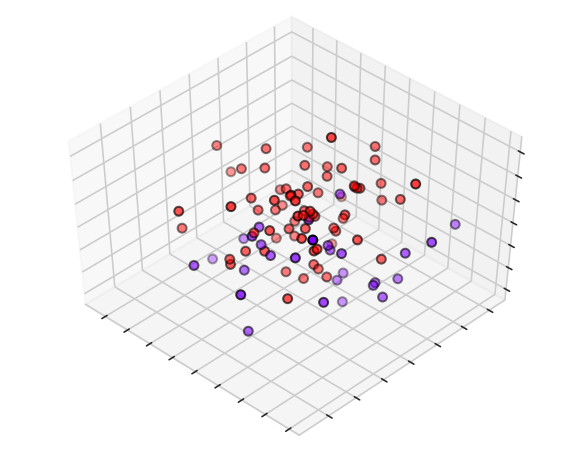

In [383]:
from mpl_toolkits.mplot3d import Axes3D
#for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    #ax.text3D(X[y == label, 0].mean(),
    #          X[y == label, 1].mean() + 1.5,
    #          X[y == label, 2].mean(), name,
    #          horizontalalignment='center',
    #          bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    # Reorder the labels to have colors matching the cluster results
c = np.choose(y_fit, [1, 2, 0]).astype(np.float)
    
# Reorder the labels to have colors matching the cluster results
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_xfm[:, 0], X_xfm[:, 1], X_xfm[:,2], edgecolor='k', c = c, cmap = "rainbow")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

#### "Flattened" plot

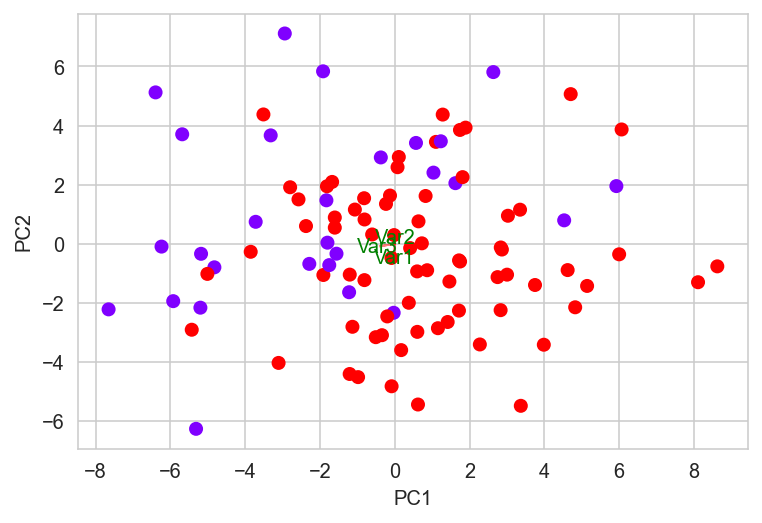

In [392]:
def flattened_pca_plot(score, coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    c = np.choose(y, [1, 2, 0]).astype(np.float)

    plt.scatter(xs ,ys, c = y_fit.values, cmap = "rainbow") #without scaling
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))

#Call the function. 
flattened_pca_plot(X_xfm[:,0:2], pca.components_) 
plt.show()

#### PCA for dimensionality reduction

In [399]:
def pca_feature_selection(X_train,y_train, components):
    from sklearn.decomposition import PCA
    np.random.seed(17)

    model = PCA(n_components = components).fit(X_train)
    X_pca = model.transform(X_train)

    # number of components
    n_pcs= model.components_.shape[0]

    # get the index of the most important feature on each component
    important_index = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
    
    # get the names
    important_cols = [X_train.columns.values[important_index[i]] for i in range(n_pcs)]
    d = dict({'PC{}'.format(i): important_cols[i] for i in range(n_pcs)})
    df_pca = pd.DataFrame(d.items())
    return df_pca

df_pca = pca_feature_selection(df_class2.iloc[:,:-5], df_class2.iloc[:,-1:],5)
df_pca

,0,1
0,PC0,X12
1,PC1,X16
2,PC2,X18
3,PC3,X12
4,PC4,X14


#### Forward Feature Selection

In [ ]:
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=1),
           k_features=5,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=3)
features = feature_selector.fit(np.array(X_train.fillna(0)), y_train)
filtered_features = X_train.columns[list(features.k_feature_idx_)]
print(filtered_features)

## File Functions

#### Concatenate all files in a folder

In [44]:
def concat(dir_in, dir_out):
    """Concatenates all files in a directory into a
    single dataframe and writes it to a single file.
    Input is source directory and output directory."""
    
    import glob
    tmp = pd.DataFrame()
    dir_working = os.getcwd()
    os.chdir (dir_in)
    i = 1
    for f in glob.glob('*{}'.format('csv')):
        #print(i,f)
        tmp = tmp.append(pd.read_csv(f))
    tmp.to_csv(dir_out, index = False)
    os.chdir(dir_working)
    return tmp

## Colormap

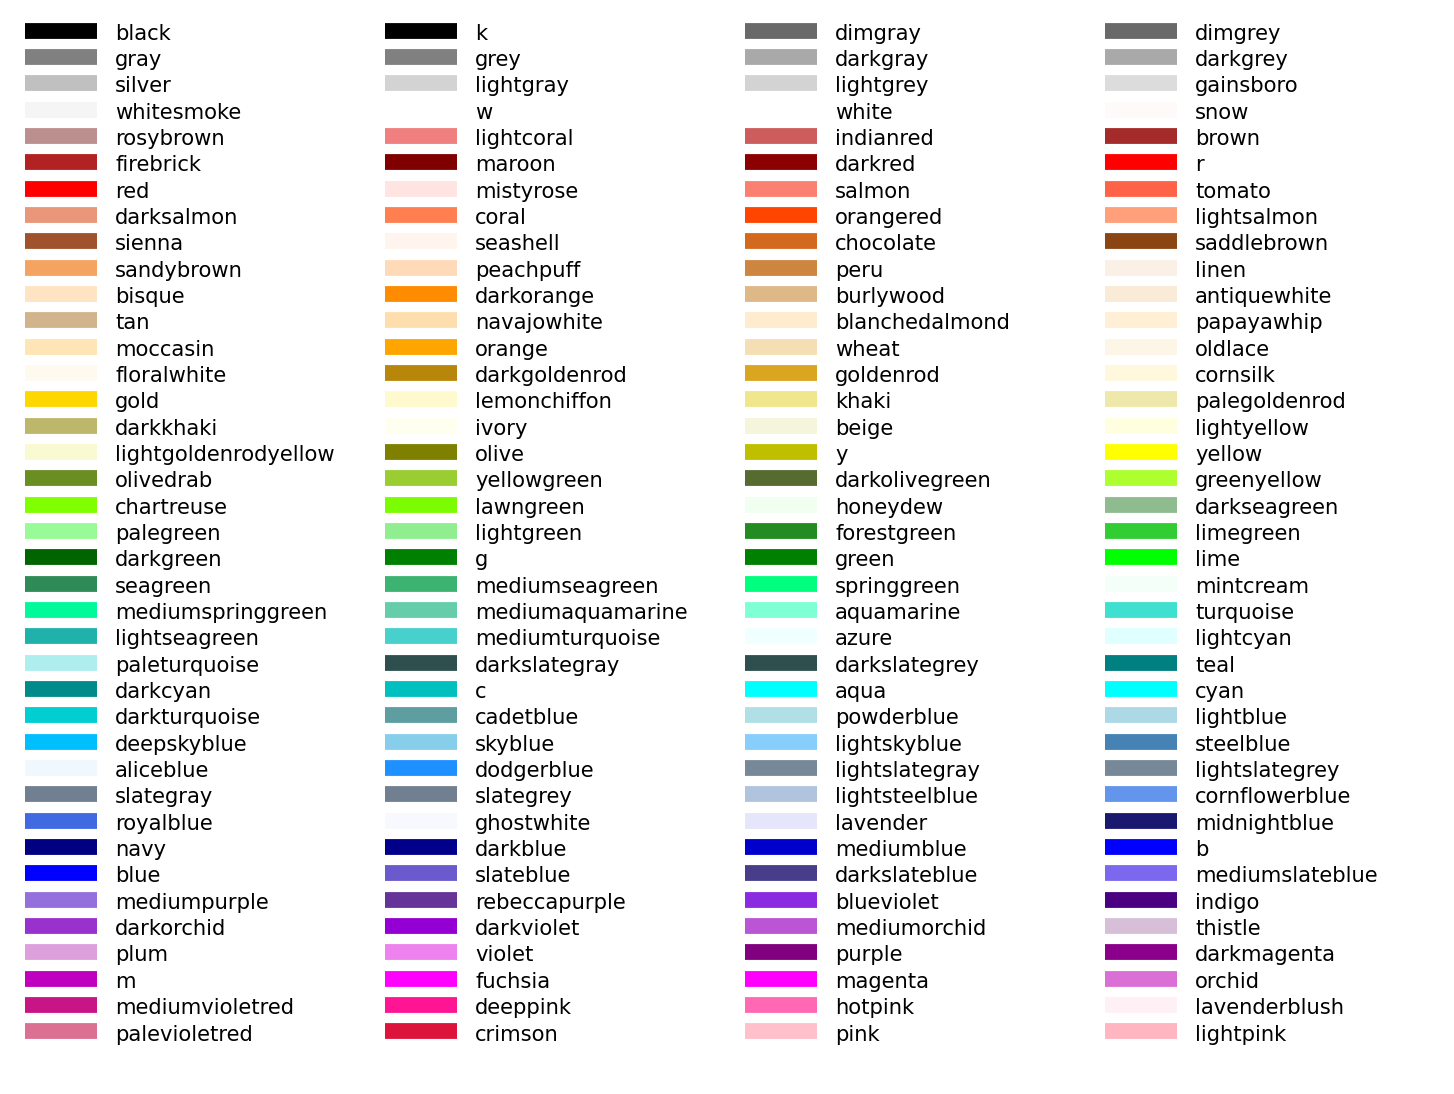

In [3]:

from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(20, 15))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

In [5]:
colors = ['mediumvioletred', 'darkcyan', 'orange', 'royalblue', 
          'firebrick','mediumorchid', 'darkslategray', 'lightseagreen', 
         'limegreen', 'magenta', 'gold', 'darkturquoise', 'rebeccapurple']